# Proyek Analisis Data: Bike Sharing
- Nama:Marella Elba Nafisa
- Email:elbanafisa@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
Bagaimana tren peminjaman sepeda tiap bulannya dari tahun 2011 hingga 2012?
- pertanyaan 2
Berapa persentase perbandingan jumlah peminjaman sepeda pada hari libur dibandingkan dengan hari biasa (weekdays)?
- pertanyaan 3
Bagaimana strategi yang efektif untuk meningkatkan jumlah peminjaman sepeda berdasarkan pola peminjaman harian yang ada?
- pertanyaan 4
Bagaimana pengaruh musim terhadap fluktuasi jumlah peminjaman sepeda?
-pertanyaan 5
Bagaimana tren jumlah peminjaman sepeda pada busy hour setiap harinya selama tahun 2011 dan 2012?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
# membuka zip dan memasukkannya ke dalam folder dataset
zip_ref = zipfile.ZipFile('/content/Bike-sharing-dataset.zip', 'r')
zip_ref.extractall('datasets/')
zip_ref.close()

In [ ]:
# membaca dan menampilkan dataset harian
df_daily = pd.read_csv('/content/datasets/day.csv')
df_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# membaca dan menampilkan dataset per jam
df_hour = pd.read_csv('/content/datasets/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

melakukan penilaian terhadap data

In [ ]:
# pengecekan missing value masing-masing datasets
print('Day Dataset:')
print(df_daily.isnull().sum())

print('/nHour Dataset:')
print(df_daily.isnull().sum())

Day Dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
/nHour Dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Hasil: Tidak ditemukan adanya missing value

In [ ]:
# pengecekan duplicate data masing-masing datasets
print('Day Dataset:')
df_daily.duplicated().sum()
print('\n')
print('Hour Dataset:')
df_hour.duplicated().sum()

Day Dataset:


Hour Dataset:


0

Hasil: Tidak ditemukan data duplikat

In [ ]:
# pengecekan tipe data
print('Day Dataset:')
print(df_daily.info())
print('\nHour Dataset:')
print(df_hour.info())

Day Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Hour Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entr

Hasil: Ditemukan ketidaksesuaian tipe data dengan datanya, yaitu pada kolom dteday, yang merupakan data tanggal

### Cleaning Data

In [ ]:
# memperbaiki tipe data pada masing-masing dataset
df_daily['dteday'] = pd.to_datetime(df_daily['dteday'])

df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# melihat data statistik deskriptif dari kolom numerik
print('Statistik deskriptif dataset day.csv')
df_daily.describe()

Statistik deskriptif dataset day.csv


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Hasil:
1.   Terdapat sebanyak 731 data
2.   Tahun yang paling banyak muncul yaitu 2012 (yr: 1)
3.   Penyewaan sepeda paling banyak pada bulan Juli (mnth: 7)
4.   Sebanyak 2.8% adalah hari libur
5.   Rata-rata cuaca adalah cerah dan berawan (weathersit: 1)
6.   Rata-rata suhu aktual adalah 0.5 derajat Celcius
7.   Dengan kelembapan sekitar 63%
8.   Jumlah pengguna biasa yaitu 848 rata-rata per hari
9.   Jumlah pengguna terdaftar yaitu 3656 rata-rata per hari
10.  Dengan total penyewaan sepeda sebesar 4504 rata-rata per hari

In [ ]:
print('\nStatistik deskriptif dataset hour.csv')
df_hour.describe()


Statistik deskriptif dataset hour.csv


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hasil:
1.   Terdapat sebanyak 17379 data
2.   Tahun yang paling banyak muncul yaitu 2012 (yr: 1)
3.   Penyewaan sepeda paling banyak pada bulan Juli (mnth: 7)
4.   Rata-rata jam per hari sekitar 12 jam
4.   Sebanyak 2.87% adalah hari libur
5.   Rata-rata cuaca adalah cerah dan berawan (weathersit: 1)
6.   Rata-rata suhu aktual adalah 0.5 derajat Celcius
7.   Dengan kelembapan sekitar 63%
8.   Jumlah pengguna biasa yaitu 37 rata-rata per jam
9.   Jumlah pengguna terdaftar yaitu 154 rata-rata per jam
10.  Dengan total penyewaan sepeda sebesar 189 rata-rata per jam

**Mengetahui korelasi antar kolom**

In [ ]:
df_daily.corr()

<ipython-input-13-fd69811fd1c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_daily.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


Hasil:
*   *temp* berkorelasi positif kuat dengan *atemp* karena bernilai 0.99
*   *temp dan atemp* berkorelasi positif moderat dengan *season* karena bernilai 0.3
*   *casual* berkorelasi positif moderat dengan *count* karena bernilai 0.67
*   *registered* berkorelasi positif kuat dengan *count* karena bernilai 0.94
*   *weathersit dan windspeed* berkorelasi negatif dengan *casual, registered, dan count*

**Demografi rental sepeda berdasarkan musim**

In [ ]:
df_daily.groupby(by='season').agg({
    'cnt':['max','min','mean','sum','std']
})

cnt                                         
         max   min         mean      sum          std
season                                               
1       7836   431  2604.132597   471348  1399.942119
2       8362   795  4992.331522   918589  1695.977235
3       8714  1115  5644.303191  1061129  1459.800381
4       8555    22  4728.162921   841613  1699.615261

Ket.
*   1: Springer
*   2: Summer
*   3: Fall
*   4: Winter

Hasil: Penyewa sepeda paling banyak pada musim gugur, sedangkan paling sedikit pada musim semi

**Demografi rental sepeda berdasarkan bulan**

In [ ]:
df_daily.groupby(by='mnth').agg({
    'cnt':['max','min','mean','sum','std']
})

cnt                                        
       max   min         mean     sum          std
mnth                                              
1     4521   431  2176.338710  134933  1161.674370
2     5062  1005  2655.298246  151352  1145.313307
3     8362   605  3692.258065  228920  1899.301812
4     7460   795  4484.900000  269094  1776.160778
5     8294  2633  5349.774194  331686  1298.711561
6     8120  3767  5772.366667  346342  1240.400031
7     8173  3285  5563.677419  344948  1273.751871
8     7865  1115  5664.419355  351194  1494.516146
9     8714  1842  5766.516667  345991  1810.130649
10    8156    22  5199.225806  322352  1988.392517
11    6852  1495  4247.183333  254831  1285.712709
12    6606   441  3403.806452  211036  1549.639353

Hasil: Jumlah peminjaman sepeda terbesar pada bulan Juni sedangkan terkecil pada bulan Januari

**Demografi rental sepeda berdasarkan hari libur**

In [ ]:
df_daily.groupby(by='holiday').agg({
    'cnt':['max','min','mean','sum','std']
})

cnt                                         
          max   min         mean      sum          std
holiday                                               
0        8714    22  4527.104225  3214244  1929.013947
1        7403  1000  3735.000000    78435  2103.350660

Ket:
*   0: Hari biasa
*   1: Hari libur

Hasil: Penyewa sepeda lebih banyak di hari biasa dari pada hari libur

**Demografi penyewa sepeda berdasarkan cuaca**

In [ ]:
df_daily.groupby(by='weathersit').agg({
    'cnt':['max','min','mean','sum','std']
})

cnt                                        
             max  min         mean      sum          std
weathersit                                              
1           8714  431  4876.786177  2257952  1879.483989
2           8362  605  4035.862348   996858  1809.109918
3           4639   22  1803.285714    37869  1240.284449

Ket.
*   1: Clear, Few clouds, Partly cloudy, Partly cloudy
*   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

Hasil: Masyarakat lebih memilih menyewa sepeda pada saat cuaca cerah dan berawan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda tiap bulannya dari tahun 2011 hingga 2012?

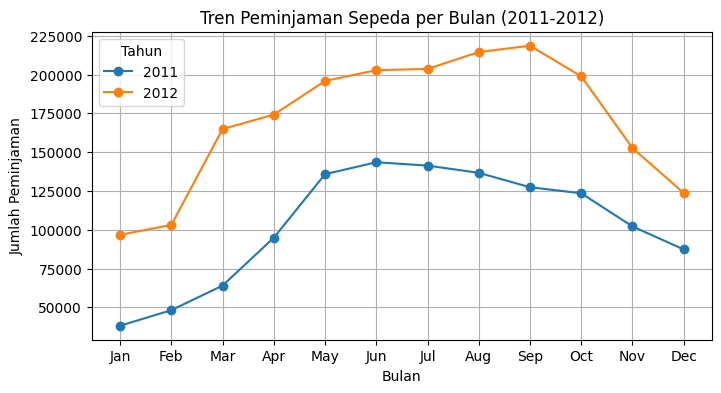

In [ ]:
df_daily['yr'] = df_daily['dteday'].dt.year
df_daily['mnth'] = df_daily['dteday'].dt.month

filtered = df_daily[(df_daily['yr'] >= 2011) & (df_daily['yr'] <= 2012)]

monthly_rentals = filtered.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

plt.figure(figsize=(8, 4))

for year in monthly_rentals['yr'].unique():
    data_year = monthly_rentals[monthly_rentals['yr'] == year]
    plt.plot(data_year['mnth'], data_year['cnt'], marker='o', label=year)

plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.title('Tren Peminjaman Sepeda per Bulan (2011-2012)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Tahun', loc='upper left')
plt.grid()
plt.show()

### Pertanyaan 2: Berapa persentase perbandingan jumlah peminjaman sepeda pada hari libur dibandingkan dengan hari biasa (weekdays)?

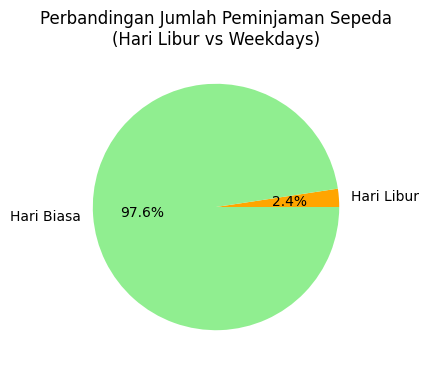

In [ ]:
total_holiday = df_daily[df_daily['holiday'] == 1]['cnt'].sum()
total_weekdays = df_daily[df_daily['holiday'] == 0]['cnt'].sum()

# Menghitung persentase kenaikan jumlah peminjaman pada hari libur dibandingkan weekdays
increase_percentage = ((total_holiday - total_weekdays) / total_weekdays) * 100

labels = ['Hari Libur', 'Hari Biasa']
sizes = [total_holiday, total_weekdays]

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['orange', 'lightgreen'])
plt.title('Perbandingan Jumlah Peminjaman Sepeda\n(Hari Libur vs Weekdays)')

plt.show()

### Pertanyaan 3: Bagaimana strategi yang efektif untuk meningkatkan jumlah peminjaman sepeda berdasarkan pola peminjaman harian yang ada?

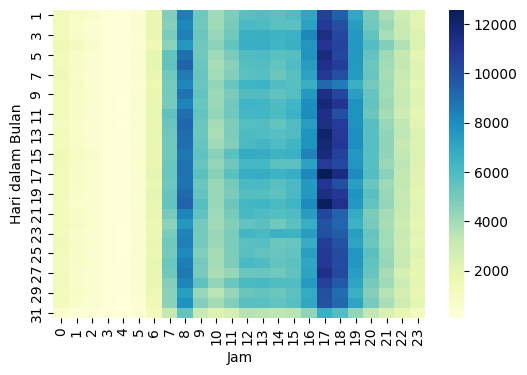

In [ ]:
df_hour['weekday'] = pd.to_datetime(df_hour['dteday']).dt.day

daily_hourly_rentals = df_hour.groupby(['weekday', 'hr'])['cnt'].sum().reset_index()

pivot_data = daily_hourly_rentals.pivot(index='weekday', columns='hr', values='cnt')
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_data, cmap='YlGnBu')  # Menggunakan skala warna Yellow-Green-Blue

plt.title(None)
plt.xlabel('Jam')
plt.ylabel('Hari dalam Bulan')
plt.show()

### Pertanyaan 4: Bagaimana pengaruh musim terhadap fluktuasi jumlah peminjaman sepeda?

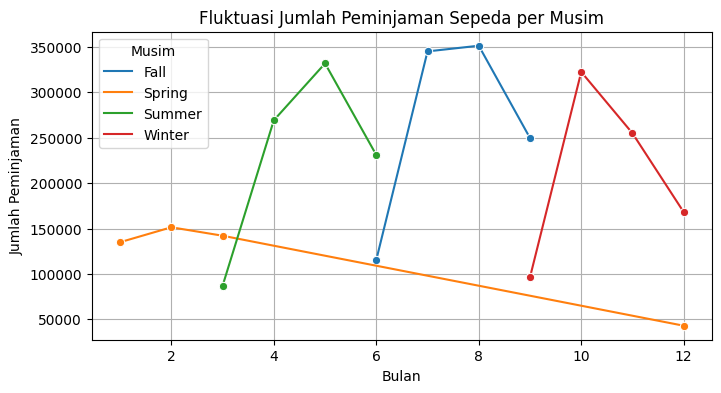

In [ ]:
df_hour['season'] = df_hour['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

seasonal_rentals = df_hour.groupby(['season', 'mnth'])['cnt'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=seasonal_rentals, x='mnth', y='cnt', hue='season', marker='o')

plt.title('Fluktuasi Jumlah Peminjaman Sepeda per Musim')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim')
plt.grid()
plt.show()

### Pertanyaan 5: Bagaimana tren jumlah peminjaman sepeda pada busy hour setiap harinya selama tahun 2011 dan 2012?

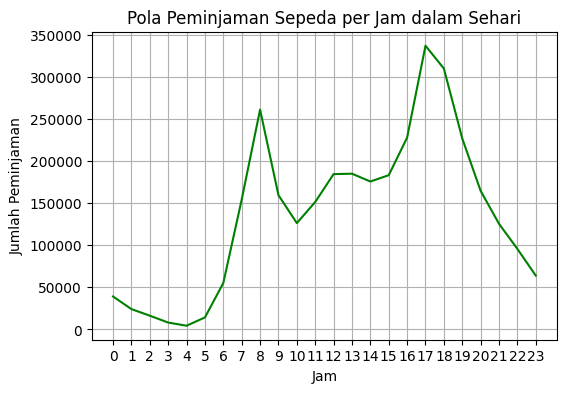

In [ ]:
hourly_rentals = df_hour.groupby('hr')['cnt'].sum()

plt.figure(figsize=(6, 4))
hourly_rentals.plot(kind='line', color='green')

plt.title('Pola Peminjaman Sepeda per Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(24))
plt.grid()
plt.show()

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2